In [1]:
!pip install -U tensorflow_datasets

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-datasets to determine which version is compatible with other requirements. This could take a while.
  Using cached idna-3.6-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl.metadata (2.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 27.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 13.0 MB/s eta 0:00:00
Using cached requests-2.31.

In [ ]:
import tensorflow as tf
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

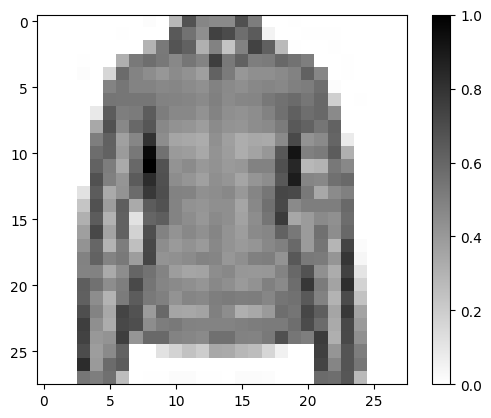

In [ ]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

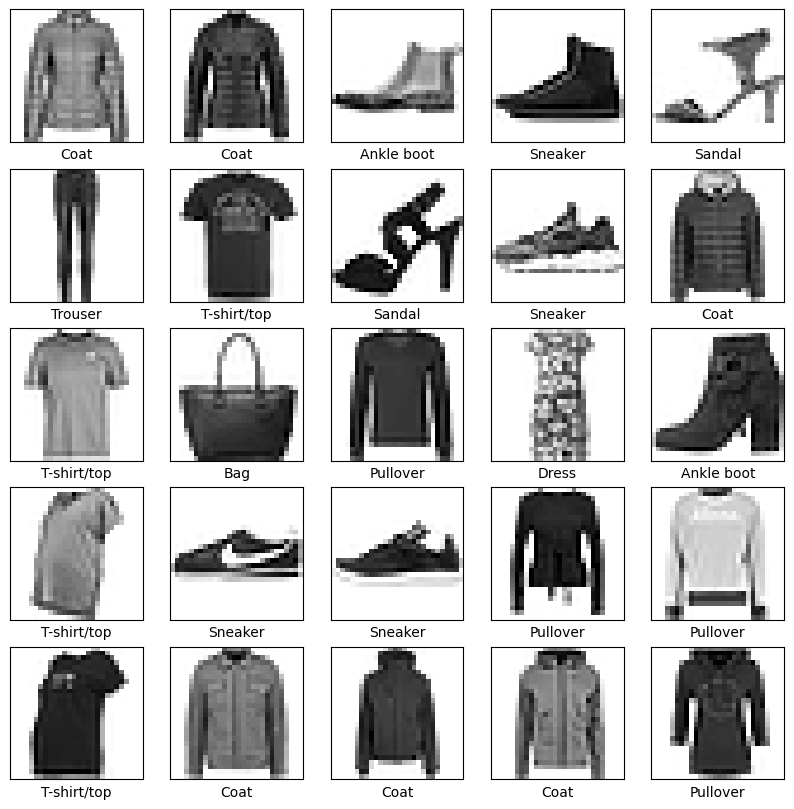

In [ ]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1), dilation_rate=(2,2),
                           use_bias=True),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
history = model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE), validation_data=test_dataset)

Epoch 1/5
1875/1875 [==============================] - 86s 41ms/step - loss: 0.3978 - accuracy: 0.8557 - val_loss: 0.3200 - val_accuracy: 0.8819
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2555 - accuracy: 0.9073 - val_loss: 0.2741 - val_accuracy: 0.9009
Epoch 3/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2102 - accuracy: 0.9220 - val_loss: 0.2467 - val_accuracy: 0.9080
Epoch 4/5
1875/1875 [==============================] - 70s 38ms/step - loss: 0.1765 - accuracy: 0.9348 - val_loss: 0.2468 - val_accuracy: 0.9133
Epoch 5/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1572 - accuracy: 0.9412 - val_loss: 0.2612 - val_accuracy: 0.9127


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
model.layers[-1].get_weights()

[array([[ 0.1059789 , -0.13140212,  0.02138383, ...,  0.18222858,
          0.24120772, -0.15761995],
        [-0.06093728, -0.13607724, -0.07663773, ...,  0.05019158,
         -0.06671991, -0.04332823],
        [-0.01389312, -0.09323132,  0.0675787 , ...,  0.14750043,
         -0.12801729,  0.01107631],
        ...,
        [-0.23885462, -0.174814  ,  0.09117737, ..., -0.02669279,
          0.196936  , -0.15739779],
        [ 0.11387873,  0.16248766, -0.01359577, ...,  0.17376682,
         -0.04644253,  0.12508988],
        [-0.01265409, -0.16603974,  0.15337366, ..., -0.10837274,
          0.09818058,  0.1347909 ]], dtype=float32),
 array([ 0.02123422, -0.12795031,  0.02943374,  0.01821039, -0.06139917,
        -0.07003709,  0.0586927 ,  0.04904914, -0.01754403, -0.01838847],
       dtype=float32)]

In [ ]:
model.layers[-1].name

'dense_1'

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 0.2612 - accuracy: 0.9127
Accuracy on test dataset: 0.9126999974250793


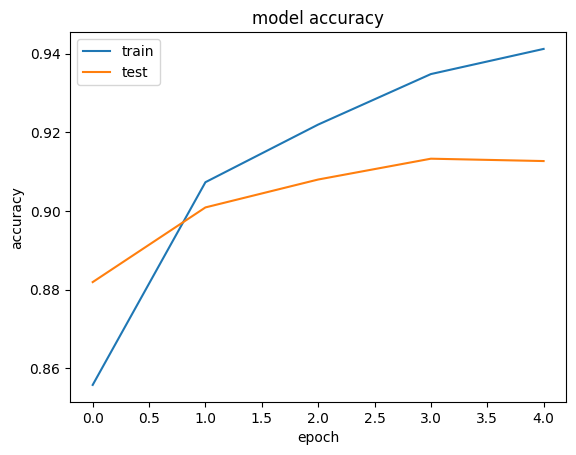

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 117ms/step


In [ ]:
predictions

array([[6.88637692e-06, 2.65618439e-07, 4.23335703e-03, 1.03909167e-06,
        6.60929918e-01, 6.71101361e-08, 3.34826708e-01, 1.15100783e-10,
        6.15850468e-07, 1.20559957e-06],
       [7.89540991e-07, 1.36970293e-08, 3.36726283e-04, 6.40065707e-07,
        6.26335621e-01, 7.04938952e-09, 3.73326093e-01, 8.13671301e-14,
        1.56922175e-09, 7.02054379e-08],
       [3.35252571e-06, 2.31375523e-08, 9.93574822e-09, 1.16069100e-06,
        1.14824095e-10, 1.59992305e-06, 5.37272848e-09, 9.45881766e-04,
        2.43830005e-08, 9.99047935e-01],
       [8.15039556e-08, 2.69770979e-08, 5.30836797e-09, 1.27910391e-06,
        1.66616054e-10, 7.78948390e-08, 1.17048851e-08, 8.44803512e-01,
        3.71180505e-07, 1.55194536e-01],
       [4.36090719e-09, 1.30876728e-13, 1.29676592e-09, 2.17949472e-14,
        9.11024846e-15, 9.99999821e-01, 2.84905411e-12, 6.28242292e-10,
        2.61895193e-11, 8.68117809e-08],
       [3.04946601e-09, 9.99999940e-01, 4.10790602e-09, 7.21047611e-10,
   